In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns 

In [9]:
# Read Data
df = pd.read_csv('data/messibetis.csv')
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [10]:
# Convert the X and Y coordinates from 100x100 to 120x80 to match it with the statsbomb pitch (mplsoccer) 

df['x'] = df['x'] * 1.2
df['y'] = df['y'] * 0.8
df['endX'] = df['endX'] * 1.2
df['endY'] = df['endY'] * 0.8
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


Text(0.5, 1.0, 'Messi vs Real Betis (2nd Half)')

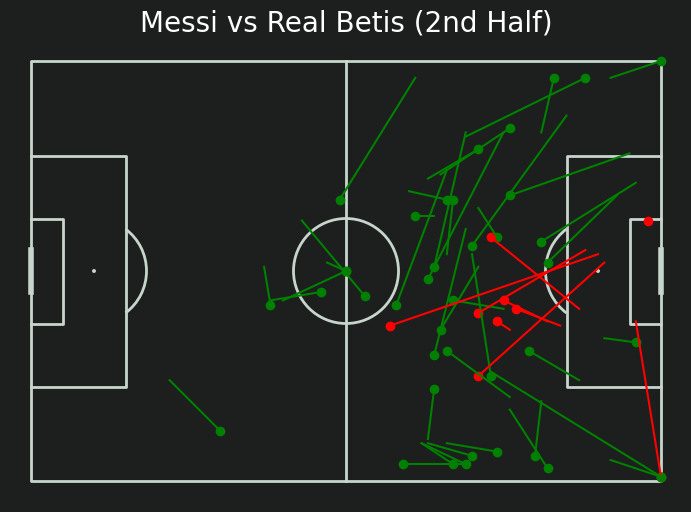

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor("#1c1f1d")
ax.patch.set_facecolor("#1c1f1d")

pitch = Pitch(pitch_type='statsbomb', pitch_color='#1c1f1d', line_color='#c7d5cc')
pitch.draw(ax=ax, figsize=(16, 11), constrained_layout=True, tight_layout=False)

#invert y axis on statsbomb pitch
plt.gca().invert_yaxis()

#plot passes using for loop
for x in range(len(df['x'])):
    if df["outcome"][x] == "Successful":
        plt.plot((df["x"][x], df["endX"][x]), (df["y"][x], df["endY"][x]), color="green")
        plt.scatter(df["x"][x], df["y"][x], color="green")
    elif df["outcome"][x] == "Unsuccessful":
        plt.plot((df["x"][x], df["endX"][x]), (df["y"][x], df["endY"][x]), color="red")
        plt.scatter(df["x"][x], df["y"][x], color="red")

plt.title("Messi vs Real Betis (2nd Half)", color="white", size=20)